In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#importing few basic libraries'
%matplotlib inline

# Basic data cleaning

In [105]:
df=pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

In [106]:
df['Like'].unique() 
#since there are two values with unique chars we'll change it

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [107]:
df.Like = df.Like.replace(['I hate it!-5','I love it!+5'],['-5','+5']).astype('int64')

In [108]:
df.replace(['No','Yes'],[1,0],inplace=True)
#replace yes and no with  binary 0,1

In [109]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,1,0,1,0,1,0,0,1,0,1,1,-3,61,Every three months,Female
1,0,0,1,0,0,0,0,0,0,1,1,2,51,Every three months,Female
2,1,0,0,0,0,0,1,0,0,0,1,1,62,Every three months,Female
3,0,0,1,0,0,0,0,0,1,1,0,4,69,Once a week,Female
4,1,0,1,0,0,0,0,1,1,0,1,2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,0,0,1,1,1,0,1,0,-5,47,Once a year,Male
1449,0,0,1,0,1,1,0,0,1,0,1,2,36,Once a week,Female
1450,0,0,1,0,1,0,1,0,0,1,1,3,52,Once a month,Female
1451,0,0,1,1,1,0,0,0,1,0,1,4,41,Every three months,Male


# Basic Data visualization

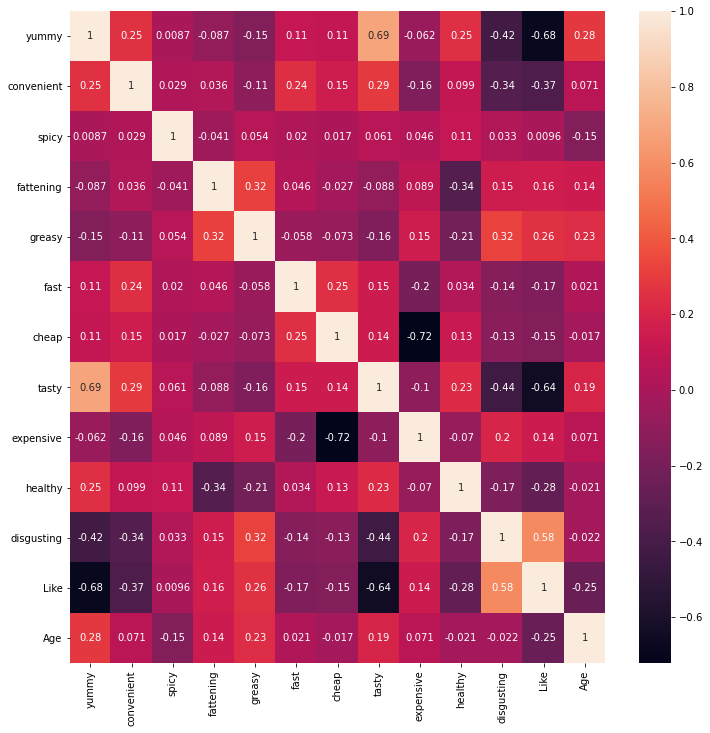

In [110]:
#let us first look at correlation plot
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

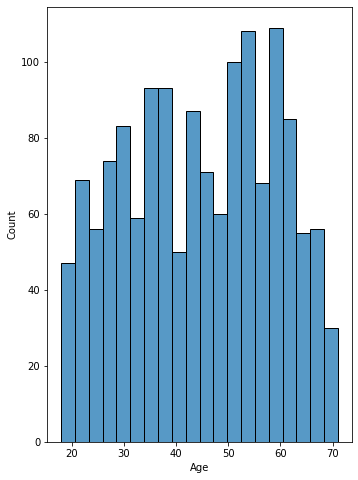

In [111]:
#let us see age distribution
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=df,bins=20)
plt.show()

# PCA

In [112]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [113]:
from sklearn.decomposition import PCA
#let us do principal component analysis by dropping 2 components (remaining 13 componenets)
dfpca=df.drop(['VisitFrequency','Gender','Like','Age'], axis = 1)


In [114]:
dfpca

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,1,0,1,0,1,0,0,1,0,1,1
1,0,0,1,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,1,1,0
4,1,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,0,0,1,1,1,0,1,0
1449,0,0,1,0,1,1,0,0,1,0,1
1450,0,0,1,0,1,0,1,0,0,1,1
1451,0,0,1,1,1,0,0,0,1,0,1


In [115]:
pca=PCA()
transformed_data=pca.fit_transform(dfpca)

In [116]:
pca.explained_variance_ratio_.cumsum()

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

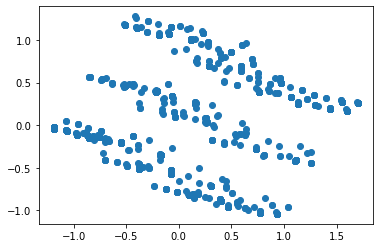

In [117]:
plt.scatter(transformed_data[:,0],transformed_data[:,1])


# Clustering

In [118]:
from sklearn.cluster import KMeans

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


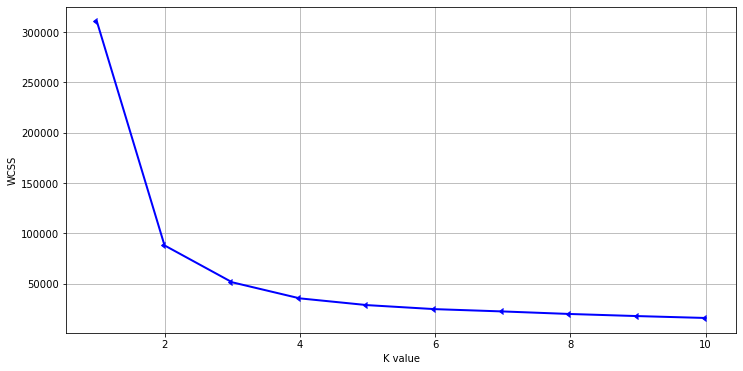

In [119]:
df1=df.drop(['VisitFrequency','Gender'],axis=1)
X1= df1.values
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="blue",marker=8)
plt.xlabel('K value')
plt.ylabel("WCSS")
plt.show()

In [120]:
#from the Elbow method we determine optimal number of clusters to be 4
# now we'll see frequency of various variables for these particular clusters
kmeans4=KMeans(n_clusters=4)
kmeans4.fit(df1)
df['cluster']=kmeans4.labels_
df1['cluster']=kmeans4.labels_

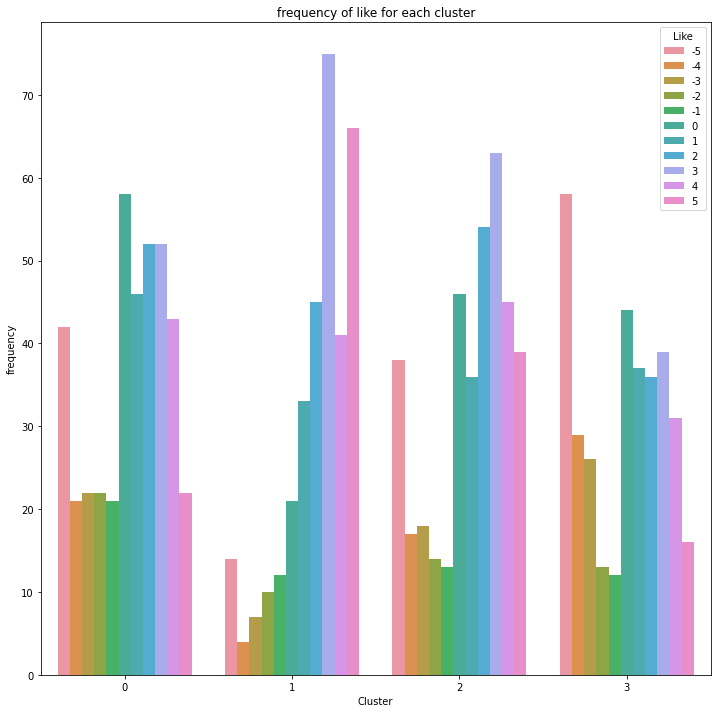

In [121]:
#for Like feature
plt.figure(figsize=(12,12))
sns.countplot(x='cluster',hue='Like',data=df1)
plt.xlabel("Cluster")
plt.ylabel("frequency")
plt.title("frequency of like for each cluster")
plt.show()


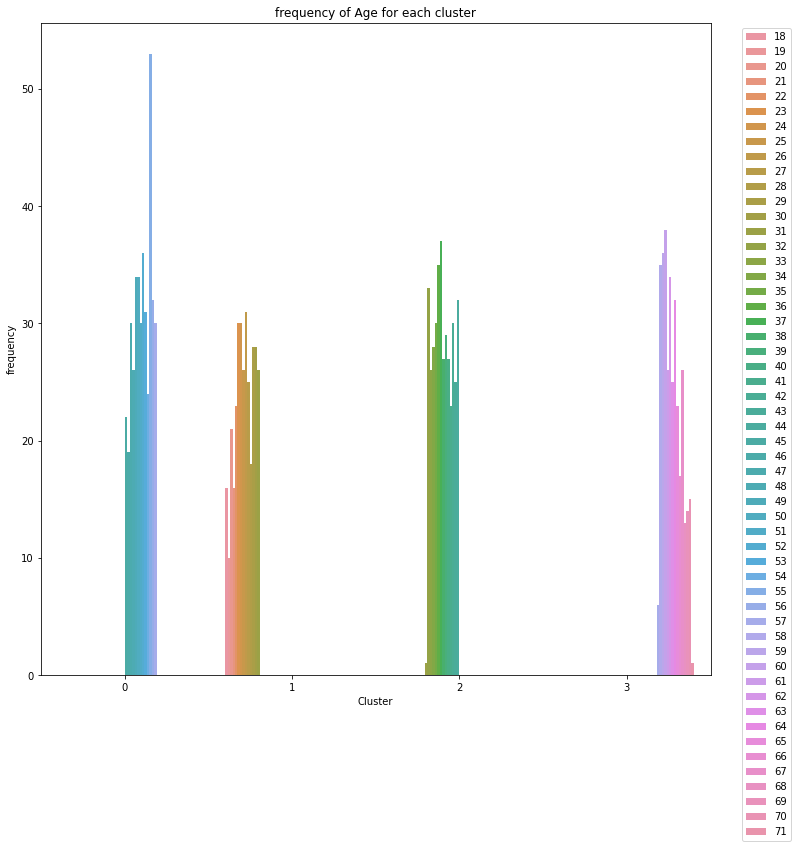

In [122]:
#for Age feature
plt.figure(figsize=(12,12))
sns.countplot(x='cluster',hue='Age',data=df1)
plt.xlabel("Cluster")
plt.ylabel("frequency")
plt.title("frequency of Age for each cluster")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

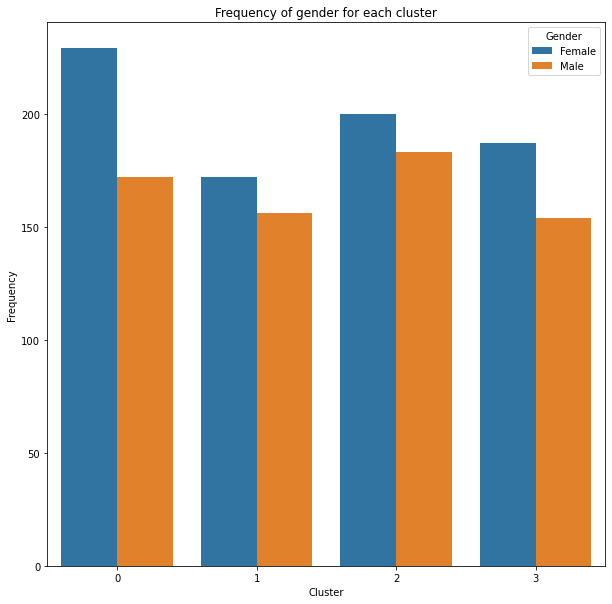

In [123]:
#frequency of gender
plt.figure(figsize=(10,10))
sns.countplot(x='cluster',hue='Gender',data=df)
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.title("Frequency of gender for each cluster")
plt.show()

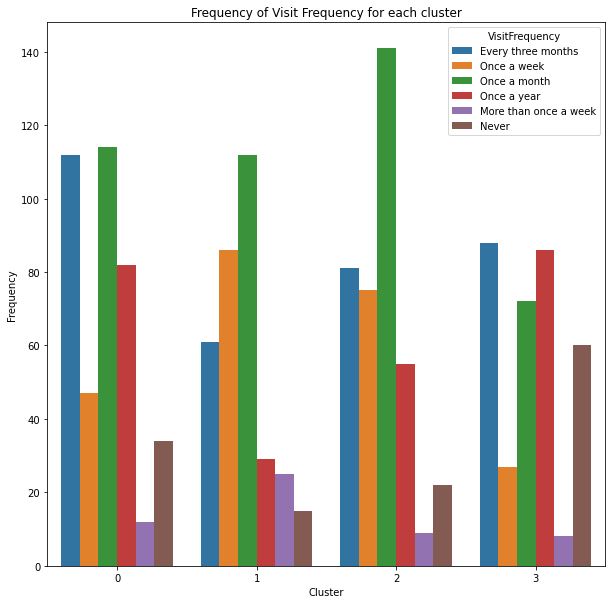

In [124]:
#visit frequency
plt.figure(figsize=(10,10))
sns.countplot(x='cluster',hue='VisitFrequency',data=df)
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.title("Frequency of Visit Frequency for each cluster")
plt.show()